<a href="https://colab.research.google.com/github/Ivanrs297/generative-deep-learning-course/blob/main/Denoising_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# Model

In [4]:
encoding_dim = 12

input_img = Input(shape = (784, ))
encoded = Dense(128, activation = "relu")(input_img)
encoded = Dense(encoding_dim, activation = "relu")(encoded)

decoded = Dense(128, activation = "relu")(encoded)
decoded = Dense(784, activation = "sigmoid")(decoded)

autoencoder = Model(input_img, decoded)


In [5]:
encoder = Model(input_img, encoded)

decoded_layer1 = autoencoder.layers[-2]
decoded_layer2 = autoencoder.layers[-1]
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, decoded_layer2(decoded_layer1(encoded_input)) )


In [8]:
autoencoder.layers

In [6]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

In [7]:
autoencoder.fit(
    X_train,
    X_train,
    epochs = 5,
    validation_data = (X_test, X_test)
)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1567 - val_loss: 0.1274
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - val_loss: 0.1197
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1187 - val_loss: 0.1154
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - val_loss: 0.1131
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1135 - val_loss: 0.1118


# Testing

In [11]:
encoded_images = encoder.predict(X_test)
encoded_images.shape

313/313 [==============================] - 0s 1ms/step


(10000, 12)

In [12]:
predicted_images = decoder.predict(encoded_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
predicted_images.shape

(10000, 784)

# Visualization

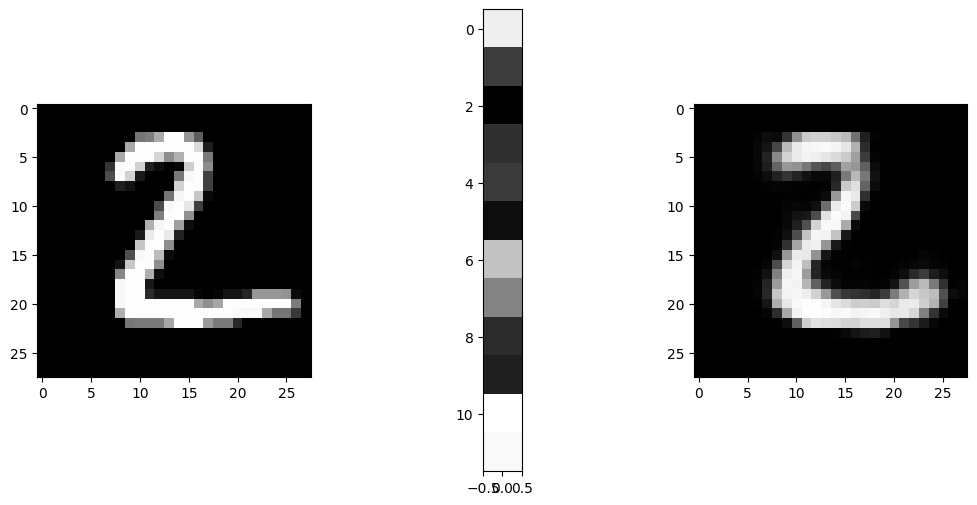

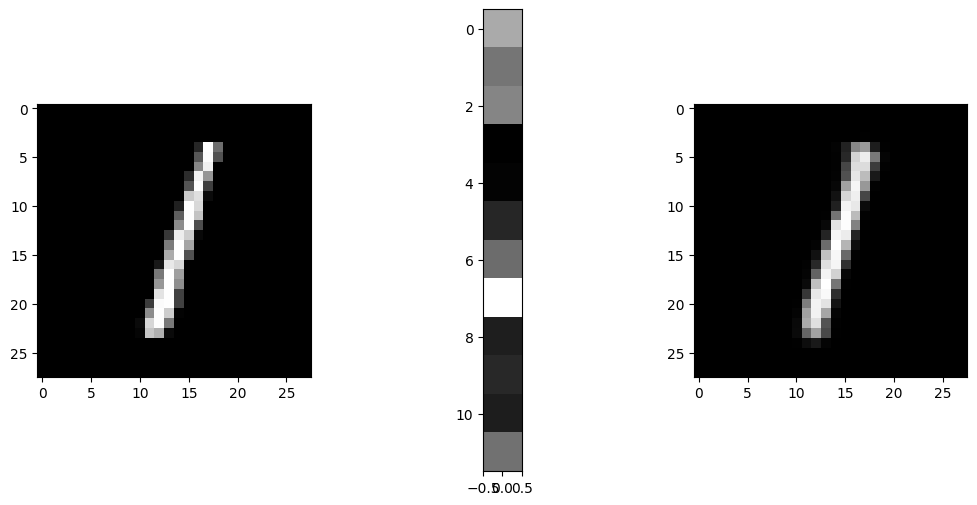

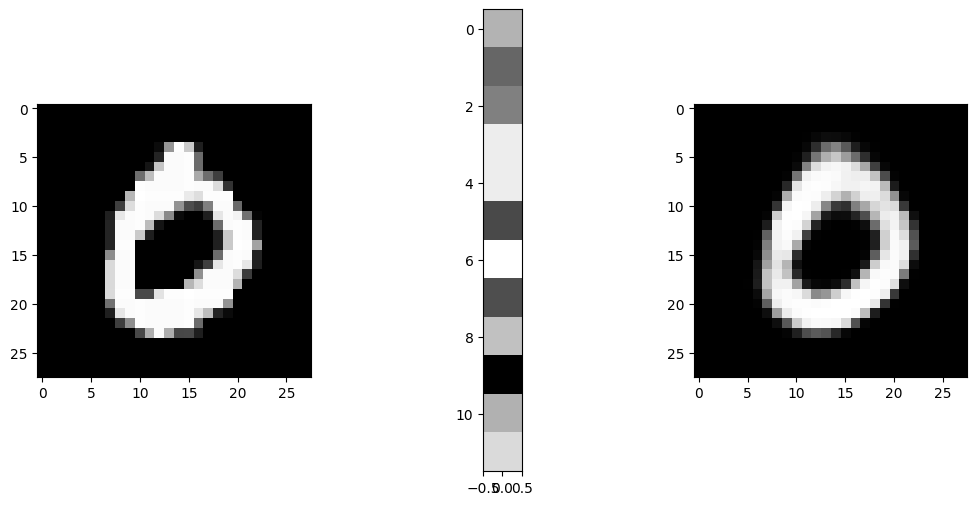

In [17]:
import matplotlib.pyplot as plt

def plot_latent_space(i):
  f = plt.figure(figsize = (12, 6))
  # Original
  f.add_subplot(1, 3, 1)
  plt.imshow(X_test[i].reshape(28, 28), cmap = "gray")

  # Latent Space
  f.add_subplot(1, 3, 2)
  plt.imshow(encoded_images[i].reshape(-1, 1), cmap = "gray")

  # Decoded
  f.add_subplot(1, 3, 3)
  plt.imshow(predicted_images[i].reshape(28, 28), cmap = "gray")

plot_latent_space(1)
plot_latent_space(2)
plot_latent_space(3)

# Denoising procedure

In [39]:
import numpy as np

noise_factor = 0.8

X_train_noisy = X_train + noise_factor * np.random.normal(size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size = X_test.shape)

np.max(X_train_noisy)

5.076089928277619

In [40]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

np.max(X_train_noisy)

1.0

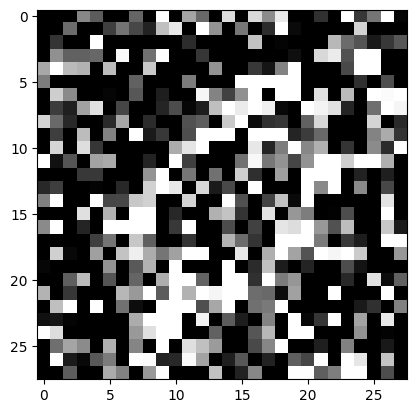

In [41]:
plt.imshow(X_train_noisy[1].reshape(28,28), cmap="gray")

# Denoising Model

In [42]:
encoding_dim = 12

input_img = Input(shape = (784, ))
encoded = Dense(128, activation = "relu")(input_img)
encoded = Dense(encoding_dim, activation = "relu")(encoded)

decoded = Dense(128, activation = "relu")(encoded)
decoded = Dense(784, activation = "sigmoid")(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

decoded_layer1 = autoencoder.layers[-2]
decoded_layer2 = autoencoder.layers[-1]
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, decoded_layer2(decoded_layer1(encoded_input)) )

autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

autoencoder.fit(
    X_train_noisy,
    X_train,
    epochs = 5,
    validation_data = (X_test_noisy, X_test)
)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2060 - val_loss: 0.1801
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1761 - val_loss: 0.1711
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1697 - val_loss: 0.1671
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1656 - val_loss: 0.1643
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1622 - val_loss: 0.1615


In [43]:
encoded_images = encoder.predict(X_test_noisy)
predicted_images = decoder.predict(encoded_images)

313/313 [==============================] - 1s 1ms/step


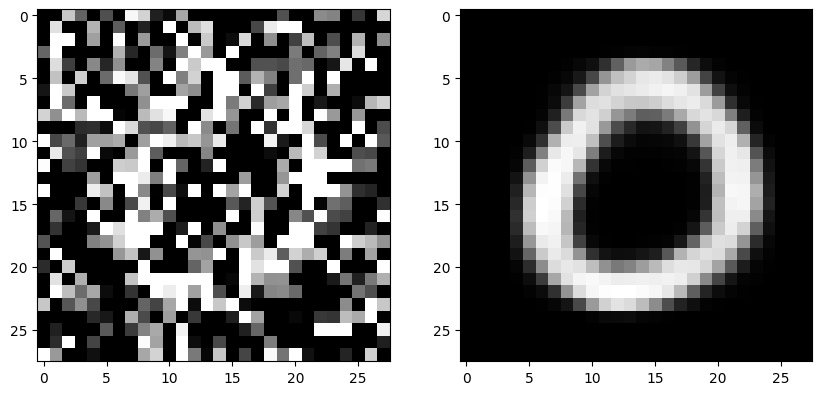

In [44]:
f = plt.figure(figsize = (10, 10))
f.add_subplot(1, 2, 1)
plt.imshow(X_test_noisy[10].reshape(28, 28), cmap="gray")

f.add_subplot(1, 2, 2)
plt.imshow(predicted_images[10].reshape(28, 28), cmap="gray")